### 데이터 준비

In [1]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

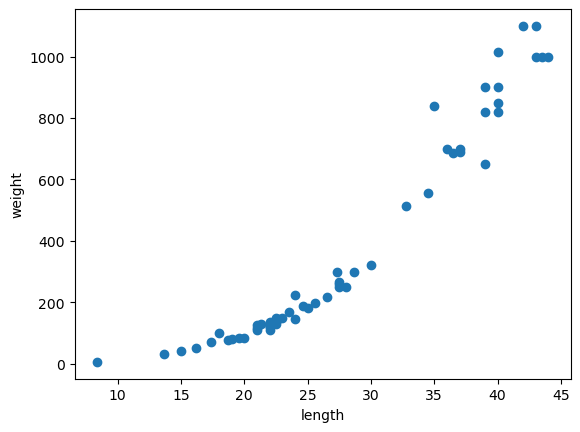

In [3]:
import matplotlib.pyplot as plt
plt.scatter(perch_length,perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(perch_length,perch_weight,random_state=42)

In [14]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)


### 결정계수(R<sup>2</sup>)

- R<sup>2</sup> = 1 - $(타깃 - 예측)^2의 합 \over (타깃 - 평균)^2의 합$

In [16]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

# k-최근접 이웃 회귀 모델 훈련
knr.fit(train_input,train_target)

print(knr.score(test_input,test_target))

0.992809406101064


In [19]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측을 만든다.
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절대값 오차를 계산한다.
mean_absolute_error(test_target,test_prediction)

19.157142857142862

### 과대적합 vs 과소적합
- 과대적합 : 훈련 세트 점수가 굉장히 높지만, 테스트 세트에서 점수가 굉장히 나쁜 것
- 과소적합 : 훈련 세트보다 테스트 세트의 점수가 높거나, 두 점수 모두 낮은 경우우

In [21]:
print(knr.score(train_input,train_target))

## 훈련 세트를 가지고 했으나, 테스트 세트보다 스코어가 낮다.

0.9698823289099254


현재의 과소적합을 해결하기 위해서는 모델은 조금 더 복잡하게 만들면 된다.

k-최근접 이웃 알고리즘으로 모델을 복잡하게 만드려면 이웃의 개수 k를 줄이면 된다.

In [22]:
# 이웃의 개수 3으로 조정
knr.n_neighbors = 3

# 모델 다시 훈련
knr.fit(train_input,train_target)
print(knr.score(test_input,test_target))

0.9746459963987609


#### 확인문제

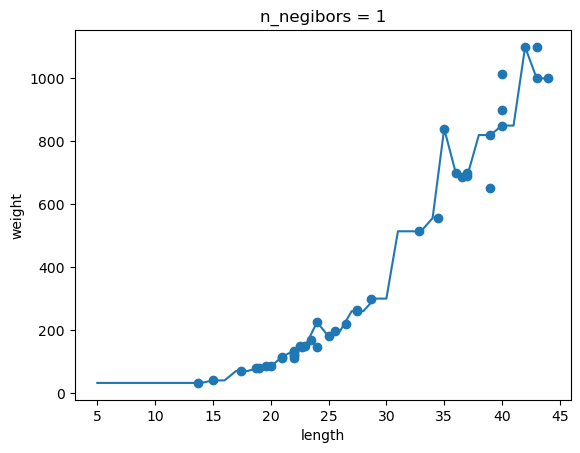

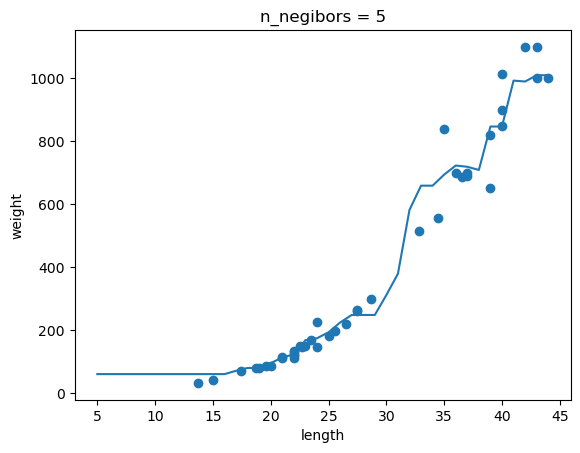

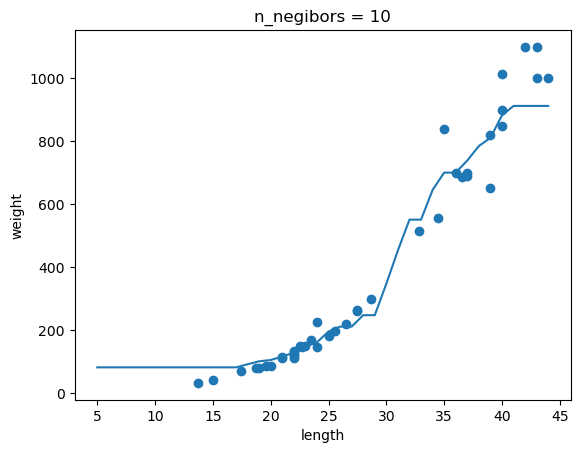

In [24]:
# k-최근접 이웃 회귀 객체 생성
knr = KNeighborsRegressor()
# 5에서 45까지 x 좌표 생성
x = np.arange(5,45).reshape(-1,1)

# n = 1 ,5 , 10 일 때 예측 결과를 그래프로 그린다.
for n in [1,5,10]:
    knr.n_neighbors = n
    knr.fit(train_input,train_target)
    #지정한 범위 x에 대한 예측을 구한다.
    prediction = knr.predict(x)

    # 훈련 세트와 예측 결과를 그래프로 그린다.

    plt.scatter(train_input,train_target)
    plt.plot(x,prediction)
    plt.title(('n_negibors = {}'.format(n)))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()